In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard.csv")

# Check data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's check how many transactions are fraudulent:

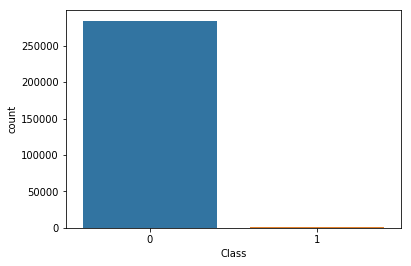

In [4]:
sns.countplot(x='Class', data=df)

In [5]:
len(df[df.Class==1])
len(df[df.Class==0])
len(df[df.Class==1])/len(df)*100

492

284315

0.1727485630620034

We are dealing with a really imbalanced dataset, just 0.17% of the transactions are fraudulent.

Now let's take a look at the Time variable.

In [6]:
day = 3600 * 24
day

df['day']=(df.Time > day)+1
len(df[df.day==1])
len(df[df.day==2])



86400

144787

140020

We will split the Time in ten Time clusters:

In [7]:
df['Time_day']=df.Time.apply(lambda x: x if x<=day else x-day)

In [8]:
df['Time_cluster']=pd.cut(df.Time_day,bins=24)

In [9]:
df.groupby('Time_cluster').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,day,Time_day
Time_cluster,,,,,,,,,,,,,,,,,,,,,
"(-86.4, 3600.0]",7695,7695,7695,7695,7695,7695,7695,7695,7695,7695,...,7695,7695,7695,7695,7695,7695,7695,7695,7695,7695
"(3600.0, 7200.0]",4222,4222,4222,4222,4222,4222,4222,4222,4222,4222,...,4222,4222,4222,4222,4222,4222,4222,4222,4222,4222
"(7200.0, 10800.0]",3326,3326,3326,3326,3326,3326,3326,3326,3326,3326,...,3326,3326,3326,3326,3326,3326,3326,3326,3326,3326
"(10800.0, 14400.0]",3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,...,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
"(14400.0, 18000.0]",2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,...,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
"(18000.0, 21600.0]",2990,2990,2990,2990,2990,2990,2990,2990,2990,2990,...,2990,2990,2990,2990,2990,2990,2990,2990,2990,2990
"(21600.0, 25200.0]",4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,...,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102
"(25200.0, 28800.0]",7242,7242,7242,7242,7242,7242,7242,7242,7242,7242,...,7242,7242,7242,7242,7242,7242,7242,7242,7242,7242
"(28800.0, 32400.0]",10275,10275,10275,10275,10275,10275,10275,10275,10275,10275,...,10275,10275,10275,10275,10275,10275,10275,10275,10275,10275


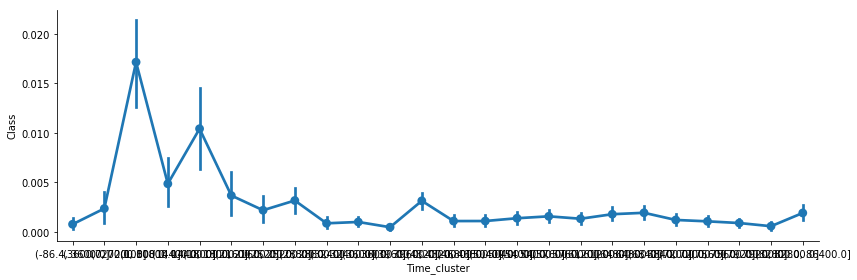

In [10]:
sns.factorplot(x='Time_cluster', data=df, y='Class',aspect=3)

We can see that some time cluster have a higher rate of fraudulent transactions, so this feature should help in our model.

Now we can drop Time, day, and Time_day:

In [11]:
df_new = df.drop(columns=['Time','day','Time_day'])

In [12]:
df_new = pd.get_dummies(df_new)

In [13]:
df_new.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Time_cluster_(-86.4, 3600.0]', 'Time_cluster_(3600.0, 7200.0]',
       'Time_cluster_(7200.0, 10800.0]', 'Time_cluster_(10800.0, 14400.0]',
       'Time_cluster_(14400.0, 18000.0]', 'Time_cluster_(18000.0, 21600.0]',
       'Time_cluster_(21600.0, 25200.0]', 'Time_cluster_(25200.0, 28800.0]',
       'Time_cluster_(28800.0, 32400.0]', 'Time_cluster_(32400.0, 36000.0]',
       'Time_cluster_(36000.0, 39600.0]', 'Time_cluster_(39600.0, 43200.0]',
       'Time_cluster_(43200.0, 46800.0]', 'Time_cluster_(46800.0, 50400.0]',
       'Time_cluster_(50400.0, 54000.0]', 'Time_cluster_(54000.0, 57600.0]',
       'Time_cluster_(57600.0, 61200.0]', 'Time_cluster_(61200.0, 64800.0]',
       'Time_cluster_(64800.0, 68400.0]', 'Time_cluster_(68400.0, 72000.0]',
       'T

In [14]:
X = df_new.drop(columns=['Class'])
y = df_new.Class

len(X)
len(y)

284807

284807

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We will standardize the data:

In [17]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

And we will split in train and test set:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=0, test_size = 0.12221, stratify=y)

In [19]:
len(X_train)
len(X_test)
len(y_train)
len(y_test)

y_train.sum()
y_test.sum()

250000

34807

250000

34807

432

60

From training data we will create a train set to train the autoencoder and a validation set to check the error and define the threshold:

In [20]:
X_train_a, X_val, y_train_a, y_val = train_test_split(X_train, y_train, random_state=0, test_size = 0.2)

In [21]:
len(X_train_a)
len(X_val)
len(y_train_a)
len(y_val)

y_train_a.sum()
y_val.sum()

200000

50000

200000

50000

341

91

From X_train_a we will get just the non-fraudulent transactions to train the autoencoder. First we put X_train_a and y_train_a in a dataframe to filter by Class==0:

In [36]:
X_train_a_df = pd.DataFrame(data=X_train_a,columns=X.columns.tolist())

y_train_a_df = pd.DataFrame(data=np.array(y_train_a),columns=['Class'])


df_train_a = pd.concat([X_train_a_df,y_train_a_df],axis = 1)

df_train_a.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,"Time_cluster_(54000.0, 57600.0]","Time_cluster_(57600.0, 61200.0]","Time_cluster_(61200.0, 64800.0]","Time_cluster_(64800.0, 68400.0]","Time_cluster_(68400.0, 72000.0]","Time_cluster_(72000.0, 75600.0]","Time_cluster_(75600.0, 79200.0]","Time_cluster_(79200.0, 82800.0]","Time_cluster_(82800.0, 86400.0]",Class
0,-1.190826,0.008110,-2.067785,-0.319980,0.282701,-0.546771,1.301051,-2.301310,-0.310362,0.190875,...,-0.247666,-0.247642,-0.245294,-0.252233,-0.241140,-0.250029,-0.257483,-0.239358,-0.199847,0
1,0.642077,0.239073,0.209613,0.485873,-0.234500,-0.796264,0.098932,-0.196006,-0.044063,-0.273813,...,-0.247666,-0.247642,-0.245294,3.964587,-0.241140,-0.250029,-0.257483,-0.239358,-0.199847,0
2,-0.602773,0.969215,0.324712,-0.462595,0.154253,-0.866112,0.463546,-3.345351,0.375650,0.153340,...,-0.247666,-0.247642,-0.245294,-0.252233,-0.241140,-0.250029,-0.257483,-0.239358,-0.199847,0
3,0.384364,-0.414595,0.720458,1.013522,-0.473677,1.020495,-0.522945,0.403216,0.779793,-0.287009,...,-0.247666,-0.247642,-0.245294,-0.252233,4.146971,-0.250029,-0.257483,-0.239358,-0.199847,0
4,0.127957,0.373207,-0.204707,-0.689461,0.730783,-0.180958,0.629337,0.008063,-0.019499,-0.513947,...,-0.247666,-0.247642,-0.245294,-0.252233,-0.241140,-0.250029,-0.257483,-0.239358,-0.199847,0


In [40]:
df_train_a_0 = df_train_a[df_train_a.Class==0]
len(df_train_a_0)
df_train_a_0.Class.sum()

199659

0

Now that we have just the non-fraudulent transations we create the final data to train the autoencoder, we drop the column 'Class' and we transform the dataframe to array:

In [43]:
X_autoencoder = df_train_a_0.drop(columns='Class')
X_autoencoder.head(2)

X_autoencoder = np.array(X_autoencoder)
X_autoencoder

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,"Time_cluster_(50400.0, 54000.0]","Time_cluster_(54000.0, 57600.0]","Time_cluster_(57600.0, 61200.0]","Time_cluster_(61200.0, 64800.0]","Time_cluster_(64800.0, 68400.0]","Time_cluster_(68400.0, 72000.0]","Time_cluster_(72000.0, 75600.0]","Time_cluster_(75600.0, 79200.0]","Time_cluster_(79200.0, 82800.0]","Time_cluster_(82800.0, 86400.0]"
0,-1.190826,0.008110,-2.067785,-0.319980,0.282701,-0.546771,1.301051,-2.301310,-0.310362,0.190875,...,-0.248527,-0.247666,-0.247642,-0.245294,-0.252233,-0.24114,-0.250029,-0.257483,-0.239358,-0.199847
1,0.642077,0.239073,0.209613,0.485873,-0.234500,-0.796264,0.098932,-0.196006,-0.044063,-0.273813,...,-0.248527,-0.247666,-0.247642,-0.245294,3.964587,-0.24114,-0.250029,-0.257483,-0.239358,-0.199847


array([[-1.19082559,  0.00810973, -2.06778495, ..., -0.25748304,
        -0.23935767, -0.19984695],
       [ 0.64207692,  0.23907324,  0.20961312, ..., -0.25748304,
        -0.23935767, -0.19984695],
       [-0.60277335,  0.96921453,  0.32471192, ..., -0.25748304,
        -0.23935767, -0.19984695],
       ...,
       [ 0.00646304,  0.63632307,  0.1536399 , ..., -0.25748304,
        -0.23935767, -0.19984695],
       [ 0.4583078 , -0.29182565,  0.78409389, ..., -0.25748304,
        -0.23935767, -0.19984695],
       [ 0.90578448, -0.20322477, -1.42679993, ..., -0.25748304,
        -0.23935767,  5.00382922]])

# Classification setting

We will use:

- 199,659 non-fraudulent transactions (Class 0) to train the autoencoder
- 50,000 records with 91 fraudulent transactions as validation set to define the error threshold
- 34,807 records with 60 fraudulent transactions as test set to make predictions

# Autoencoder

## Model 1: 1 compression layer

In [44]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [45]:
input_dim = X_autoencoder.shape[1]
encoding_dim = int((len(X_train_a_df.columns)-1) / 2)

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)

decoder = Dense(input_dim, activation='relu')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [46]:
nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model_10.h5",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_autoencoder, X_autoencoder,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    #validation_data=(X_test_s, X_test_s),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
199659/199659 [==============================] - 22s 112us/step - loss: 0.5577 - acc: 0.8070
Epoch 2/100
199659/199659 [==============================] - 18s 92us/step - loss: 0.4610 - acc: 0.8499
Epoch 3/100
199659/199659 [==============================] - 19s 98us/step - loss: 0.4430 - acc: 0.8514 0s - loss: 0.4431 - acc: 0.8
Epoch 4/100
199659/199659 [==============================] - 18s 90us/step - loss: 0.4322 - acc: 0.8524
Epoch 5/100
199659/199659 [==============================] - 19s 93us/step - loss: 0.4237 - acc: 0.8530
Epoch 6/100
199659/199659 [==============================] - 18s 91us/step - loss: 0.4192 - acc: 0.8534
Epoch 7/100
199659/199659 [==============================] - 18s 91us/step - loss: 0.4162 - acc: 0.8540
Epoch 8/100
199659/199659 [==============================] - 19s 94us/step - loss: 0.4137 - acc: 0.8543
Epoch 9/100
199659/199659 [==============================] - 19s 97us/step - loss: 0.4120 - acc: 0.8541
Epoch 10/100
199659/199659 [======

199659/199659 [==============================] - 16s 78us/step - loss: 0.3952 - acc: 0.8559
Epoch 78/100
199659/199659 [==============================] - 16s 80us/step - loss: 0.3956 - acc: 0.8557
Epoch 79/100
199659/199659 [==============================] - 16s 80us/step - loss: 0.3955 - acc: 0.8556
Epoch 80/100
199659/199659 [==============================] - 16s 80us/step - loss: 0.3951 - acc: 0.8558
Epoch 81/100
199659/199659 [==============================] - 16s 79us/step - loss: 0.3956 - acc: 0.8556
Epoch 82/100
199659/199659 [==============================] - 16s 80us/step - loss: 0.3951 - acc: 0.8558
Epoch 83/100
199659/199659 [==============================] - 16s 79us/step - loss: 0.3949 - acc: 0.8558
Epoch 84/100
199659/199659 [==============================] - 16s 79us/step - loss: 0.3959 - acc: 0.8556
Epoch 85/100
199659/199659 [==============================] - 16s 81us/step - loss: 0.3955 - acc: 0.8557
Epoch 86/100
199659/199659 [==============================] - 15s 77

# Check errors in the val set

In [47]:
predictions = autoencoder.predict(X_val)

mse = np.mean(np.power(X_val - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_val})
error_df.describe()

,reconstruction_error,true_class
count,50000.000000,50000.000000
mean,0.405968,0.001820
std,1.699662,0.042623
min,0.032304,0.000000
25%,0.132257,0.000000
50%,0.212997,0.000000
75%,0.383642,0.000000
max,136.124928,1.000000


In [48]:
import matplotlib.pyplot as plt

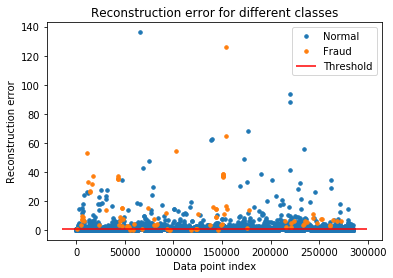

In [49]:
threshold = 0.8

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

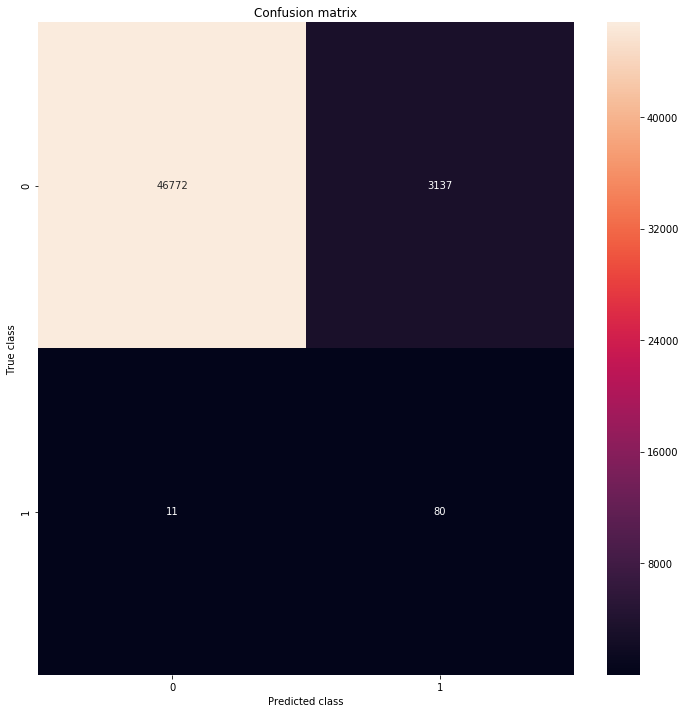

0.04836759371221282

In [51]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df.true_class, y_pred)

## Check on the test set

In [53]:
predictions_t = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions_t, 2), axis=1)

error_df_t = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df_t.describe()

,reconstruction_error,true_class
count,34807.000000,34807.000000
mean,0.400762,0.001724
std,1.276564,0.041483
min,0.034577,0.000000
25%,0.131851,0.000000
50%,0.214775,0.000000
75%,0.391179,0.000000
max,71.823302,1.000000


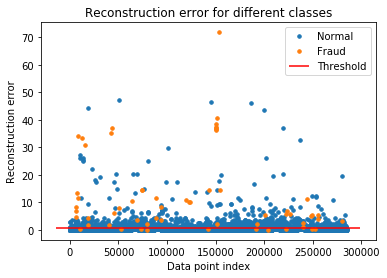

In [54]:
threshold_t = 0.8

groups = error_df_t.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_t, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

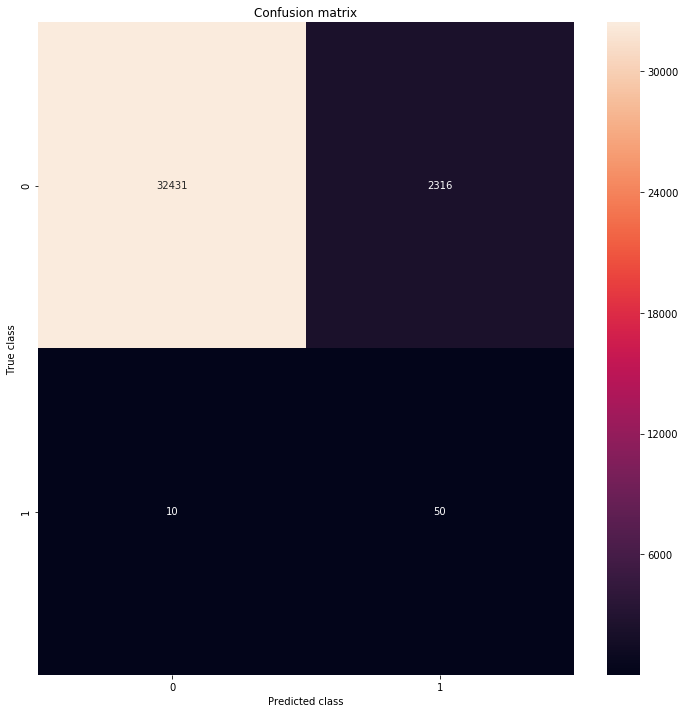

0.041220115416323165

In [55]:
y_pred_t = [1 if e > threshold_t else 0 for e in error_df_t.reconstruction_error.values]
conf_matrix_t = confusion_matrix(error_df_t.true_class, y_pred_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_t.true_class, y_pred_t)

## Model 2: 2 compression layers

In [234]:
#input_dim = X_train_s.shape[1]
#encoding_dim = int(len(X_train.columns) / 2)

#input_layer_m2 = Input(shape=(input_dim, ))

#encoder_m2 = Dense(encoding_dim, activation="relu", 
#                activity_regularizer=regularizers.l1(10e-5))(input_layer_m2)

#encoder_m2 = Dense(int(encoding_dim / 2), activation="relu")(encoder_m2)

#decoder_m2 = Dense(int(encoding_dim / 2), activation='relu')(encoder_m2)

#decoder_m2 = Dense(input_dim, activation='relu')(decoder_m2)

#autoencoder_m2 = Model(inputs=input_layer_m2, outputs=decoder_m2)

In [56]:
input_dim = X_autoencoder.shape[1]
#encoding_dim = int(len(X_train.columns) / 2)

input_layer_m2 = Input(shape=(input_dim, ))

encoder_m2 = Dense(20, activation="relu", 
                activity_regularizer=regularizers.l1(10e-4))(input_layer_m2)

encoder_m2 = Dense(10, activation="relu")(encoder_m2)

encoder_m2 = Dense(5, activation="relu")(encoder_m2)

#decoder_m2 = Dense(5, activation='relu')(encoder_m2)

decoder_m2 = Dense(10, activation='relu')(encoder_m2)

decoder_m2 = Dense(20, activation='relu')(decoder_m2)

decoder_m2 = Dense(input_dim, activation='relu')(decoder_m2)

autoencoder_m2 = Model(inputs=input_layer_m2, outputs=decoder_m2)

In [58]:
nb_epoch = 70
batch_size = 32
autoencoder_m2.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer_m2 = ModelCheckpoint(filepath="model_11.h5",
                               verbose=0,
                               save_best_only=True)

tensorboard_m2 = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history_m2 = autoencoder_m2.fit(X_autoencoder, X_autoencoder,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    #validation_data=(X_test_s, X_test_s),
                    verbose=1,
                    callbacks=[checkpointer_m2, tensorboard_m2]).history

Epoch 1/70
199659/199659 [==============================] - 25s 126us/step - loss: 0.7950 - acc: 0.4990
Epoch 2/70
199659/199659 [==============================] - 27s 137us/step - loss: 0.7516 - acc: 0.5517
Epoch 3/70
199659/199659 [==============================] - 24s 118us/step - loss: 0.7493 - acc: 0.5525
Epoch 4/70
199659/199659 [==============================] - 18s 92us/step - loss: 0.7482 - acc: 0.5522
Epoch 5/70
199659/199659 [==============================] - 21s 103us/step - loss: 0.7471 - acc: 0.5527
Epoch 6/70
199659/199659 [==============================] - 21s 105us/step - loss: 0.7459 - acc: 0.5539
Epoch 7/70
199659/199659 [==============================] - 24s 120us/step - loss: 0.7457 - acc: 0.5540
Epoch 8/70
199659/199659 [==============================] - 20s 99us/step - loss: 0.7445 - acc: 0.5545
Epoch 9/70
199659/199659 [==============================] - 19s 95us/step - loss: 0.7444 - acc: 0.5531
Epoch 10/70
199659/199659 [==============================] - ETA: 0

## Check errors in val set

In [59]:
predictions_m2 = autoencoder_m2.predict(X_val)

mse_m2 = np.mean(np.power(X_val - predictions_m2, 2), axis=1)

error_df_m2 = pd.DataFrame({'reconstruction_error': mse_m2,
                        'true_class': y_val})
error_df_m2.describe()

,reconstruction_error,true_class
count,50000.000000,50000.000000
mean,0.741266,0.001820
std,2.154806,0.042623
min,0.104738,0.000000
25%,0.321952,0.000000
50%,0.503311,0.000000
75%,0.700828,0.000000
max,154.310816,1.000000


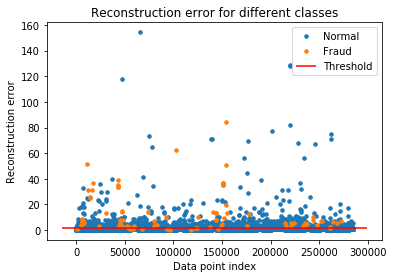

In [60]:
threshold_m2 = 1.3

groups = error_df_m2.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_m2, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

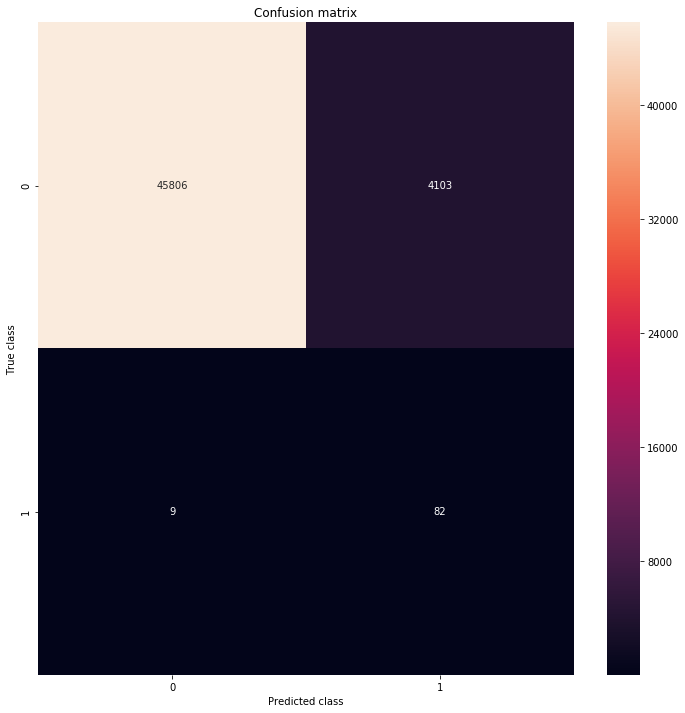

0.03835360149672591

In [61]:
y_pred_m2 = [1 if e > threshold_m2 else 0 for e in error_df_m2.reconstruction_error.values]
conf_matrix_m2 = confusion_matrix(error_df_m2.true_class, y_pred_m2)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_m2, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_m2.true_class, y_pred_m2)

## Check in test set

In [62]:
predictions_m2_t = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions_m2_t, 2), axis=1)

error_df_m2_t = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df_m2_t.describe()

,reconstruction_error,true_class
count,34807.000000,34807.000000
mean,0.400762,0.001724
std,1.276564,0.041483
min,0.034577,0.000000
25%,0.131851,0.000000
50%,0.214775,0.000000
75%,0.391179,0.000000
max,71.823302,1.000000


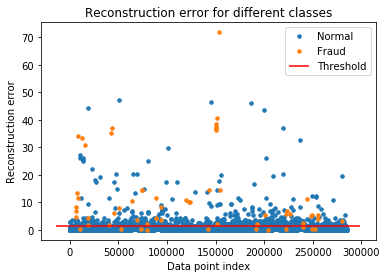

In [63]:
threshold_m2_t = 1.3

groups = error_df_m2_t.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_m2_t, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

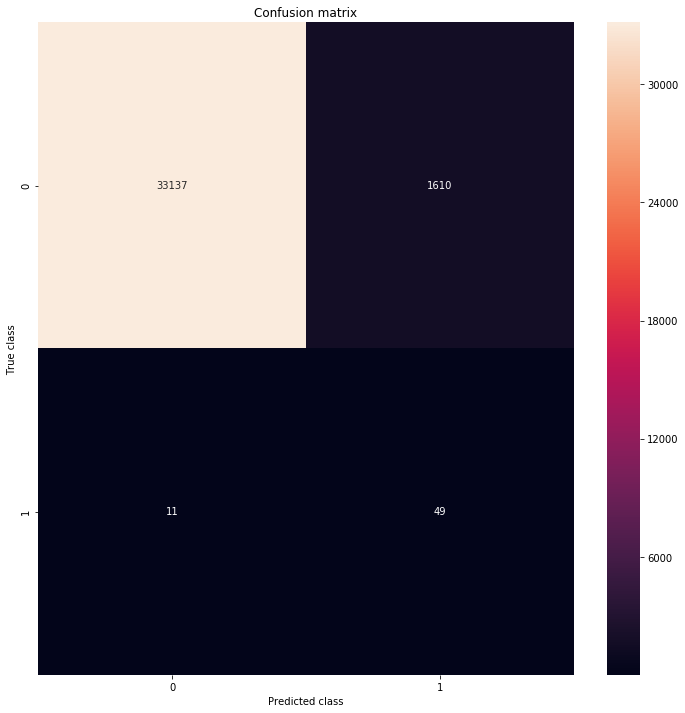

0.05700988947062246

In [64]:
y_pred_m2_t = [1 if e > threshold_m2_t else 0 for e in error_df_m2_t.reconstruction_error.values]
conf_matrix_m2_t = confusion_matrix(error_df_m2_t.true_class, y_pred_m2_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_m2_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_m2_t.true_class, y_pred_m2_t)

# Model 3: H2O Autoencoder

In [101]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
import h2o

In [102]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 days 18 hours 28 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,5 days
H2O cluster name:,prodi
H2O cluster total nodes:,1
H2O cluster free memory:,3.505 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [103]:
X_autoencoder_h2o = h2o.H2OFrame(X_autoencoder)
X_val_h2o = h2o.H2OFrame(X_val)
X_test_h2o = h2o.H2OFrame(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [104]:
denoised_model = H2OAutoEncoderEstimator(activation="Tanh", 
    hidden=[20,10,5,10,20], l1=1e-4, ignore_const_cols=False, epochs=100)
 
denoised_model.train(training_frame=X_autoencoder_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


## Check error in val set

In [105]:
denoised_test_rec_error = denoised_model.anomaly(X_val_h2o) * 100
denoised_test_rec_error_df = denoised_test_rec_error.as_data_frame()
denoised_test_rec_error_df.describe()

,Reconstruction.MSE
count,50000.000000
mean,0.183368
std,0.335505
min,0.008432
25%,0.067489
50%,0.101034
75%,0.154229
max,7.759499


In [106]:
true_class=pd.DataFrame({'true_class': y_val.values})

In [107]:
error_df_h2o = pd.concat([denoised_test_rec_error_df,true_class],axis=1)
error_df_h2o.rename(columns={'Reconstruction.MSE': 'reconstruction_error'}, inplace=True)
error_df_h2o.describe()

error_df_h2o.head()

,reconstruction_error,true_class
count,50000.000000,50000.000000
mean,0.183368,0.001820
std,0.335505,0.042623
min,0.008432,0.000000
25%,0.067489,0.000000
50%,0.101034,0.000000
75%,0.154229,0.000000
max,7.759499,1.000000


,reconstruction_error,true_class
0,0.037451,0
1,0.063957,0
2,0.241725,0
3,0.105934,0
4,0.103929,0


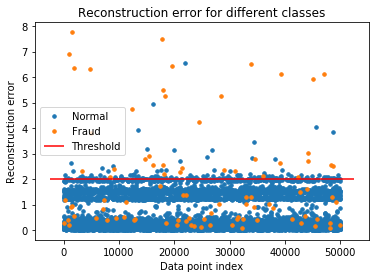

In [108]:
threshold_h2o = 2

groups = error_df_h2o.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_h2o, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

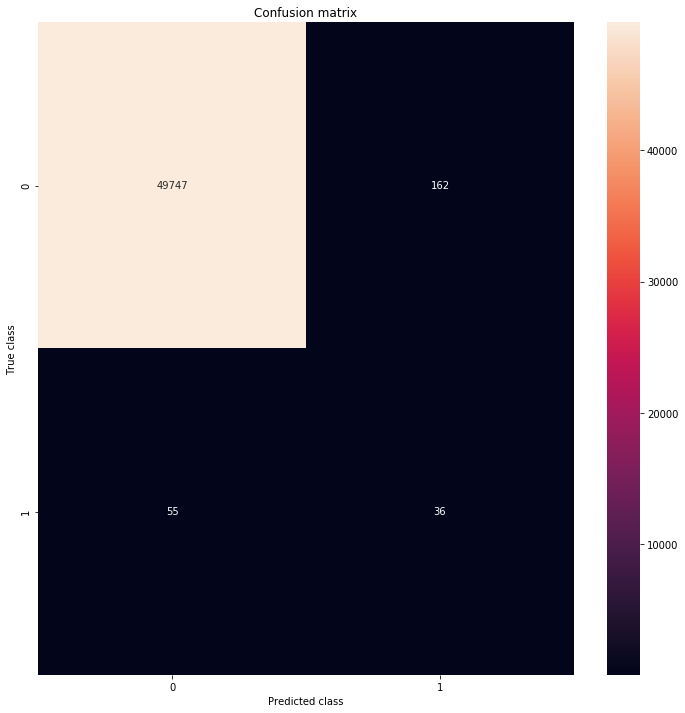

0.2491349480968858

In [109]:
y_pred_h2o = [1 if e > threshold_h2o else 0 for e in error_df_h2o.reconstruction_error.values]
conf_matrix_h2o = confusion_matrix(error_df_h2o.true_class, y_pred_h2o)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_h2o, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_h2o.true_class, y_pred_h2o)

## Check on test set

In [110]:
denoised_test_rec_error_t = denoised_model.anomaly(X_test_h2o) * 100
denoised_test_rec_error_df_t = denoised_test_rec_error_t.as_data_frame()
denoised_test_rec_error_df_t.describe()

,Reconstruction.MSE
count,34807.000000
mean,0.184661
std,0.337924
min,0.008429
25%,0.067545
50%,0.100896
75%,0.155683
max,7.511202


In [111]:
true_class_t=pd.DataFrame({'true_class': y_test.values})

In [112]:
error_df_t_h2o = pd.concat([denoised_test_rec_error_df_t,true_class_t],axis=1)
error_df_t_h2o.rename(columns={'Reconstruction.MSE': 'reconstruction_error'}, inplace=True)
error_df_t_h2o.describe()

error_df_t_h2o.head()

,reconstruction_error,true_class
count,34807.000000,34807.000000
mean,0.184661,0.001724
std,0.337924,0.041483
min,0.008429,0.000000
25%,0.067545,0.000000
50%,0.100896,0.000000
75%,0.155683,0.000000
max,7.511202,1.000000


,reconstruction_error,true_class
0,0.052264,0
1,0.105452,0
2,0.153973,0
3,0.127106,0
4,0.094332,0


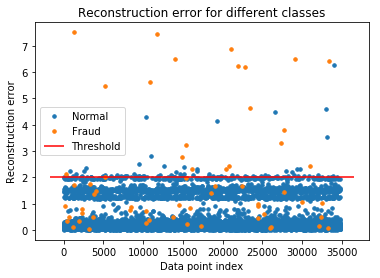

In [125]:
threshold_t_h2o = 2

groups = error_df_t_h2o.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_t_h2o, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

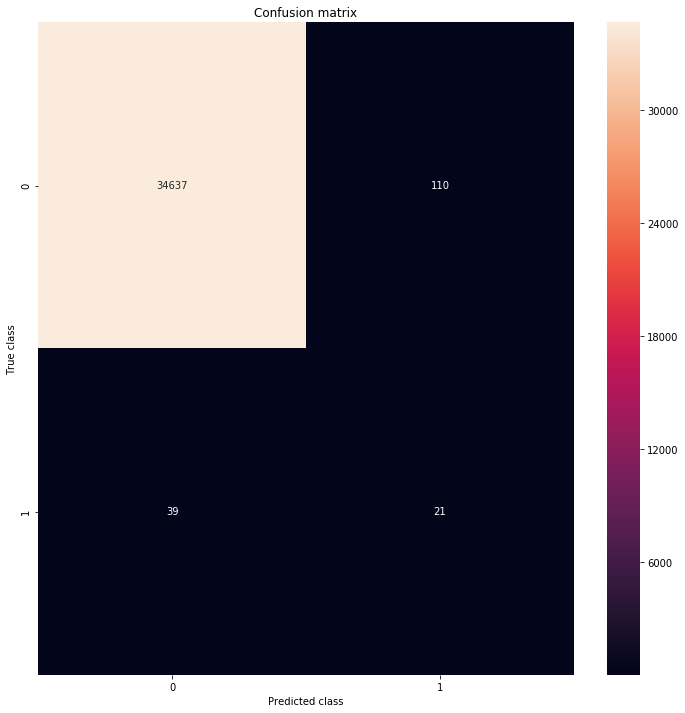

0.21989528795811517

In [126]:
y_pred_t_h2o = [1 if e > threshold_t_h2o else 0 for e in error_df_t_h2o.reconstruction_error.values]
conf_matrix_t_h2o = confusion_matrix(error_df_t_h2o.true_class, y_pred_t_h2o)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_t_h2o, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_t_h2o.true_class, y_pred_t_h2o)

## Model 4: Tied Weights Autoencoder

In [143]:
X_autoencoder.shape[0]

199659

In [127]:
import tensorflow as tf 

In [222]:
n_inputs = X_autoencoder.shape[1] 
n_hidden1 = 20 
n_hidden2 = 10
n_hidden3 = 5
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs 

learning_rate = 0.01 
l2_reg = 0.0001

In [223]:
activation = tf.nn.elu 
regularizer = tf.contrib.layers.l2_regularizer(l2_reg) 
initializer = tf.contrib.layers.variance_scaling_initializer()

In [224]:
X = tf.placeholder(tf.float32, shape =[ None, n_inputs]) 

weights1_init = initializer([ n_inputs, n_hidden1]) 
weights2_init = initializer([ n_hidden1, n_hidden2])
weights3_init = initializer([ n_hidden2, n_hidden3]) 

weights1 = tf.Variable( weights1_init, dtype = tf.float32, name ="weights1")
weights2 = tf.Variable( weights2_init, dtype = tf.float32, name ="weights2")
weights3 = tf.Variable( weights3_init, dtype = tf.float32, name ="weights3")
weights4 = tf.transpose( weights3, name ="weights4") # tied weights 
weights5 = tf.transpose( weights2, name ="weights5") # tied weights
weights6 = tf.transpose( weights1, name ="weights6") # tied weights


biases1 = tf.Variable( tf.zeros( n_hidden1), name ="biases1") 
biases2 = tf.Variable( tf.zeros( n_hidden2), name ="biases2") 
biases3 = tf.Variable( tf.zeros( n_hidden3), name ="biases3")
biases4 = tf.Variable( tf.zeros( n_hidden4), name ="biases4")
biases5 = tf.Variable( tf.zeros( n_hidden5), name ="biases4")
biases6 = tf.Variable( tf.zeros( n_outputs), name ="biases6") 

hidden1 = activation( tf.matmul( X, weights1) + biases1) 
hidden2 = activation( tf.matmul( hidden1, weights2) + biases2) 
hidden3 = activation( tf.matmul( hidden2, weights3) + biases3)
hidden4 = activation( tf.matmul( hidden3, weights4) + biases4)
hidden5 = activation( tf.matmul( hidden4, weights5) + biases5)
outputs = tf.matmul( hidden5, weights6) + biases6 

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) 
reg_loss = regularizer(weights1) + regularizer(weights2) + regularizer(weights3)
loss = reconstruction_loss + reg_loss

optimizer = tf.train.AdamOptimizer( learning_rate) 

training_op = optimizer.minimize( loss) 

init = tf.global_variables_initializer()

In [225]:
n_epochs = 50 
batch_size = 32 

num_minibatches = X_autoencoder.shape[0] // batch_size 

with tf.Session() as sess: 
    init.run() 
    for epoch in range(n_epochs): 
        epoch_cost = 0
        n_batches = num_minibatches 
        for iteration in range(n_batches): 
            X_batch = X_autoencoder[batch_size*iteration:batch_size*(iteration+1)]
            _, minibatch_cost = sess.run( [training_op , loss], feed_dict ={ X: X_batch})
            
            epoch_cost += minibatch_cost / num_minibatches
            
        
        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))

Cost after epoch 0: 0.596069
Cost after epoch 1: 0.574319
Cost after epoch 2: 0.572573
Cost after epoch 3: 0.572648
Cost after epoch 4: 0.571625
Cost after epoch 5: 0.571226
Cost after epoch 6: 0.571155
Cost after epoch 7: 0.570305
Cost after epoch 8: 0.571647
Cost after epoch 9: 0.570269
Cost after epoch 10: 0.570157
Cost after epoch 11: 0.569620
Cost after epoch 12: 0.569793
Cost after epoch 13: 0.569027
Cost after epoch 14: 0.570599
Cost after epoch 15: 0.569275
Cost after epoch 16: 0.573604
Cost after epoch 17: 0.569359
Cost after epoch 18: 0.570074
Cost after epoch 19: 0.569874
Cost after epoch 20: 0.570475
Cost after epoch 21: 0.570745
Cost after epoch 22: 0.572775
Cost after epoch 23: 0.570234
Cost after epoch 24: 0.569562
Cost after epoch 25: 0.570988
Cost after epoch 26: 0.574197
Cost after epoch 27: 0.579587
Cost after epoch 28: 0.567435
Cost after epoch 29: 0.567370
Cost after epoch 30: 0.567467
Cost after epoch 31: 0.567622
Cost after epoch 32: 0.567624
Cost after epoch 33:

In [201]:
X = tf.placeholder(tf.float32, shape =[ None, n_inputs]) 


with tf.Session() as sess:

    X.eval(feed_dict ={X: X_autoencoder})

array([[-1.1908256 ,  0.00810973, -2.067785  , ..., -0.25748304,
        -0.23935767, -0.19984695],
       [ 0.6420769 ,  0.23907323,  0.20961311, ..., -0.25748304,
        -0.23935767, -0.19984695],
       [-0.60277337,  0.9692145 ,  0.32471192, ..., -0.25748304,
        -0.23935767, -0.19984695],
       ...,
       [ 0.00646304,  0.6363231 ,  0.1536399 , ..., -0.25748304,
        -0.23935767, -0.19984695],
       [ 0.4583078 , -0.29182565,  0.7840939 , ..., -0.25748304,
        -0.23935767, -0.19984695],
       [ 0.9057845 , -0.20322478, -1.4267999 , ..., -0.25748304,
        -0.23935767,  5.003829  ]], dtype=float32)

## Check on val set

In [226]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_val = sess.run(outputs,feed_dict ={X: X_val}) 

In [227]:
output_val

array([[-0.24456511,  0.03265174,  0.23678634, ..., -0.04014399,
         0.10325897, -0.24072276],
       [ 0.83218944,  0.41049945, -0.4555699 , ..., -0.09238309,
         0.05207708,  0.52956295],
       [-0.25423458,  0.18835056, -0.20972481, ..., -0.45102215,
         0.10798772, -0.048704  ],
       ...,
       [ 0.01216607, -0.59953904, -0.08201822, ...,  0.41266948,
        -0.16377524,  0.6089233 ],
       [ 0.6938748 ,  2.5501995 ,  1.1981716 , ..., -1.7201558 ,
        -0.32203612, -1.1367801 ],
       [ 0.4754845 ,  1.2033594 ,  0.40026093, ..., -1.1390798 ,
         0.05498988, -0.5343852 ]], dtype=float32)

In [228]:
mse_m4 = np.mean(np.power(X_val - output_val, 2), axis=1)

error_df_m4 = pd.DataFrame({'reconstruction_error': mse_m4,
                        'true_class': y_val})
error_df_m4.describe()

,reconstruction_error,true_class
count,50000.000000,50000.000000
mean,1.372864,0.001820
std,2.677580,0.042623
min,0.414996,0.000000
25%,0.742932,0.000000
50%,0.953784,0.000000
75%,1.380988,0.000000
max,173.638185,1.000000


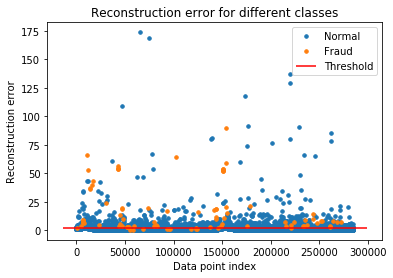

In [302]:
threshold_m4 = 2.5

groups = error_df_m4.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_m4, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

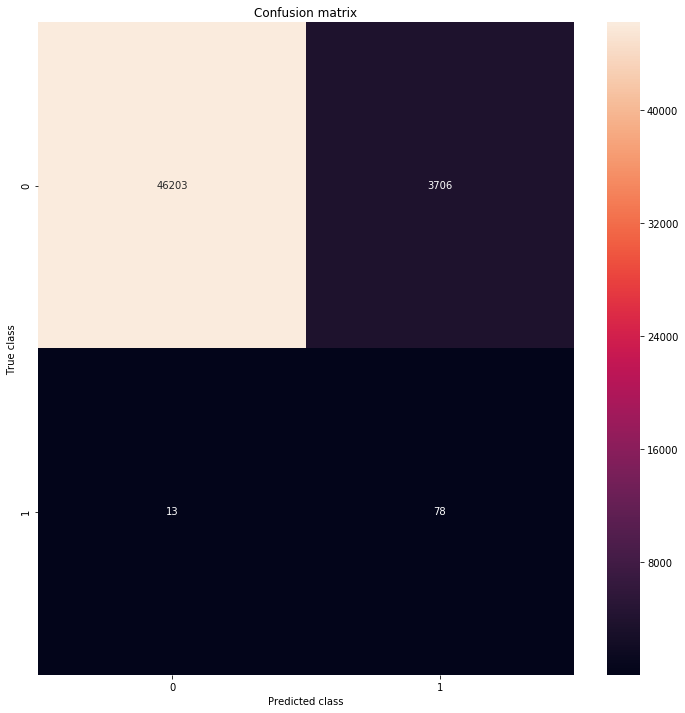

0.04025806451612903

In [303]:
y_pred_m4 = [1 if e > threshold_m4 else 0 for e in error_df_m4.reconstruction_error.values]
conf_matrix_m4 = confusion_matrix(error_df_m4.true_class, y_pred_m4)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_m4, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_m4.true_class, y_pred_m4)

## Check on test set

In [231]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_test = sess.run(outputs,feed_dict ={X: X_test}) 

In [232]:
mse_m4_t = np.mean(np.power(X_test - output_test, 2), axis=1)

error_df_m4_t = pd.DataFrame({'reconstruction_error': mse_m4_t,
                        'true_class': y_test})
error_df_m4_t.describe()

,reconstruction_error,true_class
count,34807.000000,34807.000000
mean,1.252701,0.001724
std,1.875329,0.041483
min,0.389255,0.000000
25%,0.692459,0.000000
50%,0.935785,0.000000
75%,1.402350,0.000000
max,154.408281,1.000000


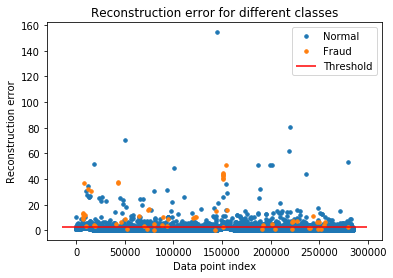

In [304]:
threshold_m4_t = 2.5

groups = error_df_m4_t.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_m4_t, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

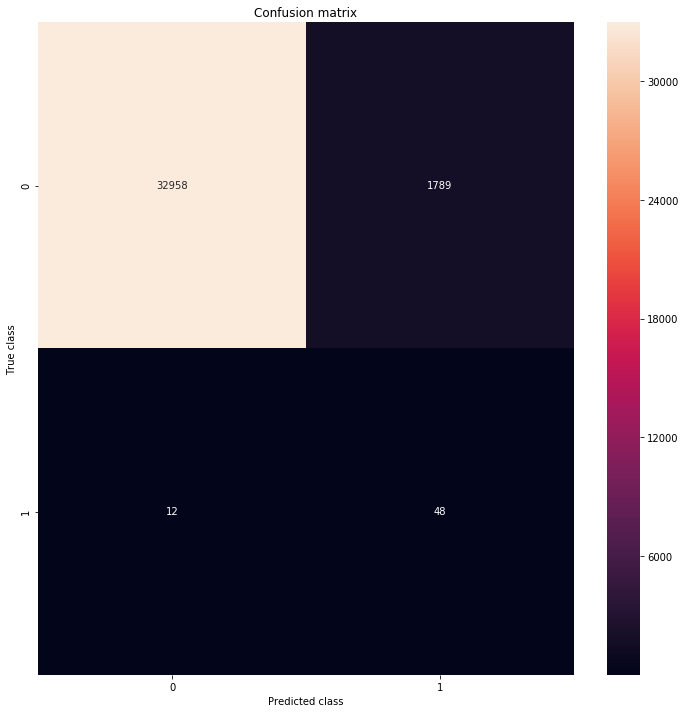

0.05060622034791777

In [305]:
y_pred_m4_t = [1 if e > threshold_m4_t else 0 for e in error_df_m4_t.reconstruction_error.values]
conf_matrix_m4_t = confusion_matrix(error_df_m4_t.true_class, y_pred_m4_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_m4_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_m4_t.true_class, y_pred_m4_t)

# Model 5: Variational Autoencoder

### Tensorflow

In [235]:
from functools import partial

In [272]:
n_inputs_v = X_autoencoder.shape[1]  
n_hidden1_v = 20 
n_hidden2_v = 20 
n_hidden3_v = 5 # codings 
n_hidden4_v = n_hidden2_v 
n_hidden5_v = n_hidden1_v 
n_outputs_v = n_inputs_v

learning_rate_v = 0.001

In [273]:
initializer = tf.contrib.layers.variance_scaling_initializer() 
my_dense_layer = partial( tf.layers.dense, activation = tf.nn.elu, kernel_initializer = initializer)

In [274]:
X = tf.placeholder( tf.float32, shape=[None, n_inputs_v]) 

hidden1_v = my_dense_layer( X, n_hidden1_v) 
hidden2_v = my_dense_layer( hidden1_v, n_hidden2_v) 
hidden3_mean = my_dense_layer( hidden2_v, n_hidden3_v, activation = None) 
hidden3_gamma = my_dense_layer( hidden2_v, n_hidden3_v, activation = None) 
noise = tf.random_normal( tf.shape( hidden3_gamma), dtype = tf.float32) 
hidden3_v = hidden3_mean + tf.exp( 0.5 * hidden3_gamma) * noise 
hidden4_v = my_dense_layer( hidden3_v, n_hidden4_v) 
hidden5_v = my_dense_layer( hidden4_v, n_hidden5_v) 
logits = my_dense_layer( hidden5_v, n_outputs_v, activation = None) 
outputs_v = tf.sigmoid( logits) 

xentropy = tf.nn.sigmoid_cross_entropy_with_logits( labels = X, logits = logits) 
reconstruction_loss_v = tf.reduce_sum( xentropy) 
latent_loss = 0.5 * tf.reduce_sum( tf.exp( hidden3_gamma) + tf.square( hidden3_mean) - 1.0 - hidden3_gamma) 
loss_v = reconstruction_loss_v + latent_loss

optimizer_v = tf.train.AdamOptimizer( learning_rate = learning_rate_v) 

training_op_v = optimizer_v.minimize( loss_v) 

init = tf.global_variables_initializer() 

#saver = tf.train.Saver() 

In [275]:
n_epochs_v = 1 
batch_size_v = 32 

num_minibatches_v = X_autoencoder.shape[0] // batch_size_v 

with tf.Session() as sess: 
    init.run() 
    for epoch in range(n_epochs_v): 
        epoch_cost = 0
        n_batches = num_minibatches_v 
        for iteration in range(n_batches): 
            X_batch = X_autoencoder[batch_size_v*iteration:batch_size_v*(iteration+1)]
            _, minibatch_cost = sess.run( [training_op_v , loss_v], feed_dict ={ X: X_batch})
            
            epoch_cost += minibatch_cost / num_minibatches_v
            
        
        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))

Cost after epoch 0: nan


### Keras

In [290]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf

n_z = 5
m = 32

# Q(z|X) -- encoder
inputs = Input(shape=(X_autoencoder.shape[1],))
h_q1 = Dense(20, activation='relu')(inputs)
h_q2 = Dense(10, activation='relu')(h_q1)
mu = Dense(n_z, activation='linear')(h_q2)
log_sigma = Dense(n_z, activation='linear')(h_q2)

def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=K.shape(mu), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
decoder_hidden_1 = Dense(10, activation='relu')
decoder_hidden_2 = Dense(20, activation='relu')
decoder_out = Dense(X_autoencoder.shape[1], activation='sigmoid')

h_p1 = decoder_hidden_1(z)
h_p2 = decoder_hidden_2(h_p1)
outputs = decoder_out(h_p2)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder_vae = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h1 = decoder_hidden_1(d_in)
d_h2 = decoder_hidden_2(d_h1)
d_out = decoder_out(d_h2)
decoder_vae = Model(d_in, d_out)

def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

In [291]:
n_epoch = 2

vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(X_autoencoder, X_autoencoder, batch_size=m, nb_epoch=n_epoch,verbose=1)

Epoch 1/2


 64480/199659 [========>.....................] - ETA: 6:23:29 - loss: 354.32 - ETA: 29:50 - loss: 364.3344 - ETA: 17:04 - loss: 353.99 - ETA: 12:25 - loss: 347.52 - ETA: 9:26 - loss: 338.5654 - ETA: 8:36 - loss: 334.542 - ETA: 7:28 - loss: 327.216 - ETA: 6:18 - loss: 315.196 - ETA: 5:26 - loss: 298.956 - ETA: 4:53 - loss: 284.139 - ETA: 4:26 - loss: 269.357 - ETA: 3:58 - loss: 251.576 - ETA: 3:48 - loss: 244.480 - ETA: 3:36 - loss: 235.345 - ETA: 3:25 - loss: 227.246 - ETA: 3:19 - loss: 221.775 - ETA: 3:09 - loss: 214.479 - ETA: 3:03 - loss: 209.822 - ETA: 2:54 - loss: 202.722 - ETA: 2:47 - loss: 196.966 - ETA: 2:43 - loss: 193.506 - ETA: 2:37 - loss: 189.118 - ETA: 2:32 - loss: 185.004 - ETA: 2:29 - loss: 181.667 - ETA: 2:25 - loss: 178.112 - ETA: 2:23 - loss: 175.979 - ETA: 2:17 - loss: 172.202 - ETA: 2:12 - loss: 167.836 - ETA: 2:08 - loss: 165.139 - ETA: 2:07 - loss: 163.579 - ETA: 2:04 - loss: 161.061 - ETA: 2:02 - loss: 159.302 - ETA: 2:01 - loss: 157.650 - ETA: 2:00 - loss: 156.

136032/199659 [===================>..........] - ETA: 46s - loss: 86.424 - ETA: 46s - loss: 86.378 - ETA: 46s - loss: 86.312 - ETA: 46s - loss: 86.262 - ETA: 46s - loss: 86.212 - ETA: 46s - loss: 86.187 - ETA: 46s - loss: 86.167 - ETA: 46s - loss: 86.158 - ETA: 46s - loss: 86.127 - ETA: 46s - loss: 86.121 - ETA: 46s - loss: 86.106 - ETA: 46s - loss: 86.076 - ETA: 46s - loss: 86.054 - ETA: 46s - loss: 86.012 - ETA: 46s - loss: 85.986 - ETA: 46s - loss: 85.964 - ETA: 46s - loss: 85.934 - ETA: 46s - loss: 85.925 - ETA: 46s - loss: 85.854 - ETA: 46s - loss: 85.844 - ETA: 46s - loss: 85.808 - ETA: 46s - loss: 85.806 - ETA: 46s - loss: 85.753 - ETA: 46s - loss: 85.743 - ETA: 46s - loss: 85.699 - ETA: 46s - loss: 85.691 - ETA: 46s - loss: 85.666 - ETA: 46s - loss: 85.645 - ETA: 46s - loss: 85.603 - ETA: 46s - loss: 85.563 - ETA: 46s - loss: 85.560 - ETA: 46s - loss: 85.538 - ETA: 46s - loss: 85.530 - ETA: 46s - loss: 85.493 - ETA: 46s - loss: 85.457 - ETA: 45s - loss: 85.409 - ETA: 45s - loss

199659/199659 [==============================] - ETA: 19s - loss: 79.295 - ETA: 19s - loss: 79.281 - ETA: 19s - loss: 79.261 - ETA: 19s - loss: 79.253 - ETA: 18s - loss: 79.244 - ETA: 18s - loss: 79.230 - ETA: 18s - loss: 79.215 - ETA: 18s - loss: 79.206 - ETA: 18s - loss: 79.185 - ETA: 18s - loss: 79.182 - ETA: 18s - loss: 79.170 - ETA: 18s - loss: 79.155 - ETA: 18s - loss: 79.154 - ETA: 18s - loss: 79.144 - ETA: 18s - loss: 79.140 - ETA: 18s - loss: 79.135 - ETA: 18s - loss: 79.136 - ETA: 18s - loss: 79.126 - ETA: 18s - loss: 79.127 - ETA: 18s - loss: 79.124 - ETA: 18s - loss: 79.117 - ETA: 18s - loss: 79.106 - ETA: 17s - loss: 79.101 - ETA: 17s - loss: 79.088 - ETA: 17s - loss: 79.084 - ETA: 17s - loss: 79.068 - ETA: 17s - loss: 79.046 - ETA: 17s - loss: 79.034 - ETA: 17s - loss: 79.021 - ETA: 17s - loss: 79.006 - ETA: 17s - loss: 79.004 - ETA: 17s - loss: 78.999 - ETA: 17s - loss: 78.991 - ETA: 17s - loss: 78.991 - ETA: 17s - loss: 78.984 - ETA: 17s - loss: 78.982 - ETA: 17s - loss

 69664/199659 [=========>....................] - ETA: 3:37 - loss: 77.00 - ETA: 1:27 - loss: 74.60 - ETA: 1:12 - loss: 73.59 - ETA: 1:04 - loss: 73.19 - ETA: 1:08 - loss: 72.92 - ETA: 1:08 - loss: 73.88 - ETA: 1:09 - loss: 73.76 - ETA: 1:03 - loss: 73.46 - ETA: 1:08 - loss: 73.64 - ETA: 1:05 - loss: 73.67 - ETA: 1:01 - loss: 73.30 - ETA: 56s - loss: 73.3272 - ETA: 57s - loss: 73.148 - ETA: 58s - loss: 73.172 - ETA: 55s - loss: 72.926 - ETA: 56s - loss: 72.862 - ETA: 54s - loss: 73.234 - ETA: 53s - loss: 73.468 - ETA: 53s - loss: 73.336 - ETA: 52s - loss: 73.329 - ETA: 53s - loss: 73.342 - ETA: 52s - loss: 73.456 - ETA: 53s - loss: 73.598 - ETA: 50s - loss: 73.522 - ETA: 49s - loss: 73.413 - ETA: 47s - loss: 73.262 - ETA: 48s - loss: 73.188 - ETA: 47s - loss: 73.021 - ETA: 47s - loss: 72.833 - ETA: 46s - loss: 72.921 - ETA: 45s - loss: 72.889 - ETA: 44s - loss: 72.920 - ETA: 44s - loss: 72.917 - ETA: 44s - loss: 72.947 - ETA: 44s - loss: 72.992 - ETA: 43s - loss: 72.943 - ETA: 43s - los

136288/199659 [===================>..........] - ETA: 36s - loss: 72.910 - ETA: 36s - loss: 72.917 - ETA: 36s - loss: 72.923 - ETA: 36s - loss: 72.935 - ETA: 36s - loss: 72.928 - ETA: 35s - loss: 72.945 - ETA: 36s - loss: 72.950 - ETA: 35s - loss: 72.953 - ETA: 35s - loss: 72.953 - ETA: 35s - loss: 72.960 - ETA: 35s - loss: 72.960 - ETA: 35s - loss: 72.971 - ETA: 35s - loss: 72.972 - ETA: 35s - loss: 72.973 - ETA: 35s - loss: 72.976 - ETA: 35s - loss: 72.973 - ETA: 35s - loss: 72.973 - ETA: 35s - loss: 72.990 - ETA: 35s - loss: 72.986 - ETA: 35s - loss: 72.979 - ETA: 34s - loss: 72.983 - ETA: 35s - loss: 72.981 - ETA: 34s - loss: 72.995 - ETA: 34s - loss: 72.995 - ETA: 34s - loss: 72.993 - ETA: 34s - loss: 72.994 - ETA: 34s - loss: 72.993 - ETA: 34s - loss: 73.005 - ETA: 34s - loss: 73.007 - ETA: 34s - loss: 72.995 - ETA: 35s - loss: 72.998 - ETA: 35s - loss: 72.999 - ETA: 35s - loss: 73.000 - ETA: 35s - loss: 72.990 - ETA: 35s - loss: 72.989 - ETA: 35s - loss: 72.997 - ETA: 35s - loss

199659/199659 [==============================] - ETA: 17s - loss: 72.990 - ETA: 17s - loss: 72.989 - ETA: 17s - loss: 72.985 - ETA: 17s - loss: 72.984 - ETA: 17s - loss: 72.988 - ETA: 17s - loss: 72.985 - ETA: 17s - loss: 72.984 - ETA: 17s - loss: 72.981 - ETA: 16s - loss: 72.990 - ETA: 16s - loss: 72.980 - ETA: 16s - loss: 72.975 - ETA: 16s - loss: 72.981 - ETA: 16s - loss: 72.982 - ETA: 16s - loss: 72.986 - ETA: 15s - loss: 72.988 - ETA: 15s - loss: 72.983 - ETA: 15s - loss: 72.977 - ETA: 15s - loss: 72.973 - ETA: 15s - loss: 72.973 - ETA: 15s - loss: 72.973 - ETA: 15s - loss: 72.974 - ETA: 15s - loss: 72.966 - ETA: 15s - loss: 72.965 - ETA: 15s - loss: 72.965 - ETA: 15s - loss: 72.966 - ETA: 15s - loss: 72.962 - ETA: 15s - loss: 72.963 - ETA: 15s - loss: 72.961 - ETA: 14s - loss: 72.959 - ETA: 14s - loss: 72.949 - ETA: 14s - loss: 72.952 - ETA: 14s - loss: 72.949 - ETA: 14s - loss: 72.943 - ETA: 14s - loss: 72.942 - ETA: 14s - loss: 72.940 - ETA: 14s - loss: 72.938 - ETA: 14s - loss

## Check on val set

In [292]:
predictions_m5 = vae.predict(X_val)

mse_m5 = np.mean(np.power(X_val - predictions_m5, 2), axis=1)

error_df_m5 = pd.DataFrame({'reconstruction_error': mse_m5,
                        'true_class': y_val})
error_df_m5.describe()

,reconstruction_error,true_class
count,50000.000000,50000.000000
mean,0.999342,0.001820
std,2.247743,0.042623
min,0.406005,0.000000
25%,0.566215,0.000000
50%,0.692728,0.000000
75%,0.923943,0.000000
max,156.720235,1.000000


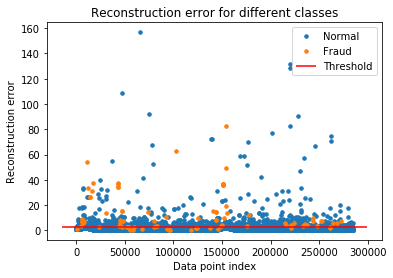

In [298]:
threshold_m5 = 2.5

groups = error_df_m5.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_m5, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

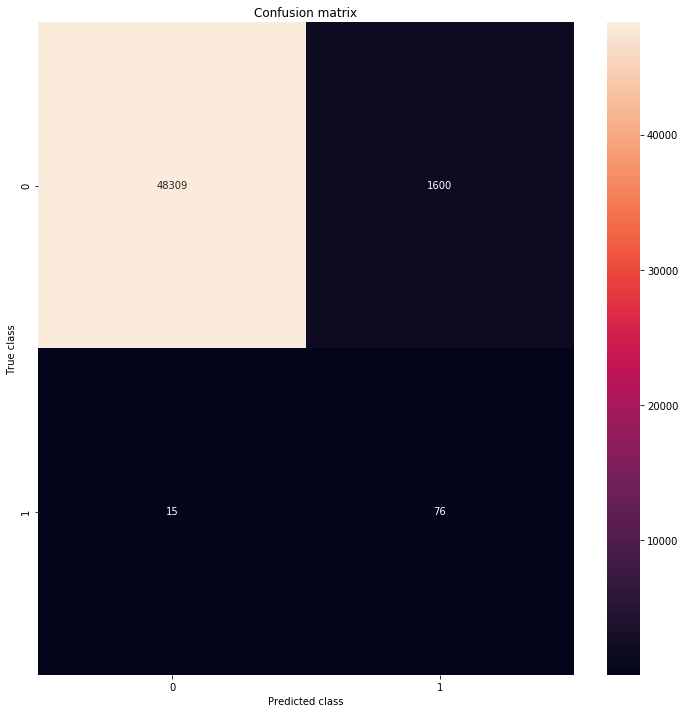

0.08602150537634407

In [299]:
y_pred_m5 = [1 if e > threshold_m5 else 0 for e in error_df_m5.reconstruction_error.values]
conf_matrix_m5 = confusion_matrix(error_df_m5.true_class, y_pred_m5)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_m5, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_m5.true_class, y_pred_m5)

## Check on test set

In [294]:
predictions_m5_t = vae.predict(X_test)

mse_m5_t = np.mean(np.power(X_test - predictions_m5_t, 2), axis=1)

error_df_m5_t = pd.DataFrame({'reconstruction_error': mse_m5_t,
                        'true_class': y_test})
error_df_m5_t.describe()

,reconstruction_error,true_class
count,34807.000000,34807.000000
mean,0.986055,0.001724
std,1.818297,0.041483
min,0.391495,0.000000
25%,0.565695,0.000000
50%,0.692888,0.000000
75%,0.923472,0.000000
max,150.859258,1.000000


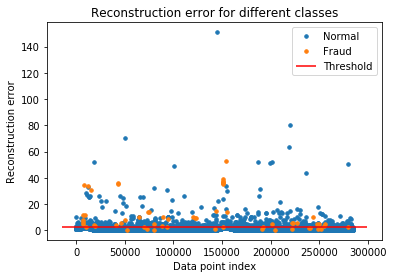

In [300]:
threshold_m5_t = 2.5

groups = error_df_m5_t.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_m5_t, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

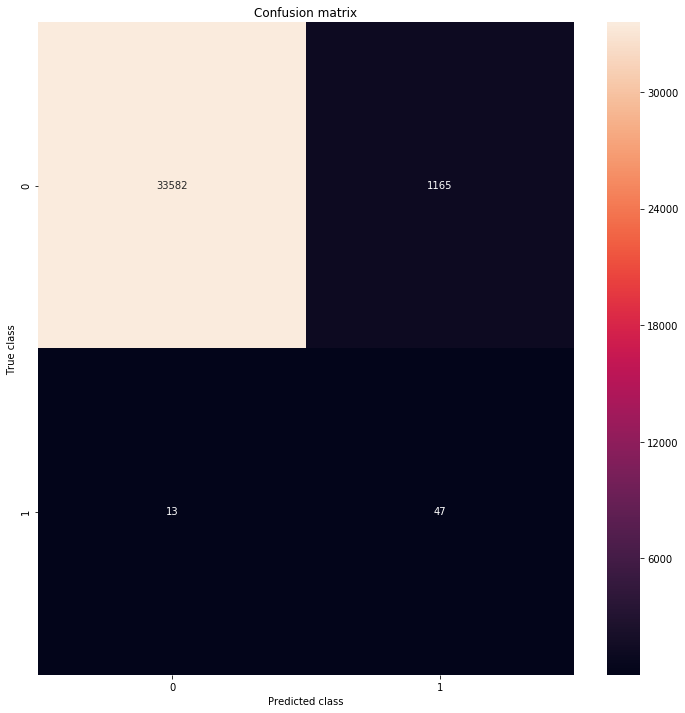

0.07389937106918239

In [301]:
y_pred_m5_t = [1 if e > threshold_m5_t else 0 for e in error_df_m5_t.reconstruction_error.values]
conf_matrix_m5_t = confusion_matrix(error_df_m5_t.true_class, y_pred_m5_t)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_m5_t, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(error_df_m5_t.true_class, y_pred_m5_t)

Saving autoencoder results on test set:

In [306]:
error_df_t.to_csv('errors_auto_1_layer.csv')

In [307]:
error_df_m2_t.to_csv('errors_auto_2_layer.csv')

In [311]:
error_df_t_h2o.to_csv('errors_auto_h2o.csv')

In [309]:
error_df_m4_t.to_csv('errors_auto_tied_weights.csv')

In [310]:
error_df_m5_t.to_csv('errors_auto_variational.csv')

# LightGBM

In [66]:
import lightgbm as lgb

In [67]:
parameters = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.08,
    'is_unbalance': 'true', # replaced with scale_pos_weight argument
    'num_leaves': 7,  # 2^max_depth - 1
    'max_depth': 4,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 100,  # Number of bucketed bin for feature values
    'subsample': 0.7,  # Subsample ratio of the training instance.
    'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 0, # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'min_split_gain': 0,
    #'scale_pos_weight': 200 # because training data is extremely unbalanced 
    }

#categorical = []

In [68]:
XG_train = lgb.Dataset(X_train_a, label=y_train_a.values,
                          feature_name=X.columns.tolist()
                          #categorical_feature=categorical
                          )
XG_valid = lgb.Dataset(X_val, label=y_val.values,
                          feature_name=X.columns.tolist()
                          #categorical_feature=categorical
                          )

In [69]:
lgb_model = lgb.train(parameters, 
                     XG_train, 
                     valid_sets=[XG_train,XG_valid], 
                     valid_names=['train','valid'], 
                     num_boost_round=3000,
                     early_stopping_rounds=50,
                     verbose_eval=10)

Training until validation scores don't improve for 50 rounds.
[10]	train's auc: 0.987492	valid's auc: 0.967451
[20]	train's auc: 0.994225	valid's auc: 0.97358
[30]	train's auc: 0.996038	valid's auc: 0.978214
[40]	train's auc: 0.99736	valid's auc: 0.984484
[50]	train's auc: 0.998331	valid's auc: 0.984201
[60]	train's auc: 0.998784	valid's auc: 0.985308
[70]	train's auc: 0.999161	valid's auc: 0.98607
[80]	train's auc: 0.999354	valid's auc: 0.984937
[90]	train's auc: 0.999522	valid's auc: 0.985858
[100]	train's auc: 0.999618	valid's auc: 0.983794
[110]	train's auc: 0.999666	valid's auc: 0.98335
[120]	train's auc: 0.999694	valid's auc: 0.983974
Early stopping, best iteration is:
[71]	train's auc: 0.999181	valid's auc: 0.98667


## Check on val set

In [84]:
y_prob_lgb_v=lgb_model.predict(X_val)

In [91]:
pred_threshold_v=0.5
y_pred_lgb_v = (y_prob_lgb_v>=pred_threshold_v)*1

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

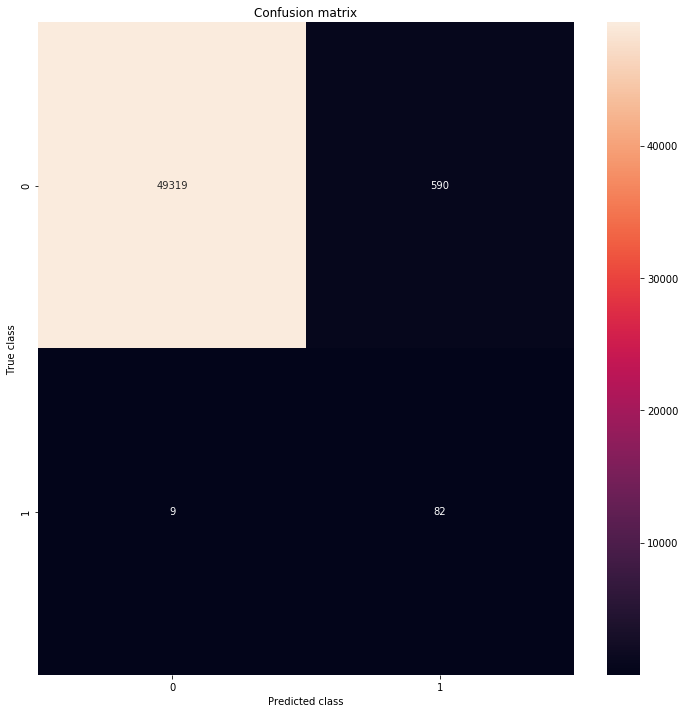

0.21494102228047182

In [92]:
conf_matrix_lgb_v = confusion_matrix(y_val, y_pred_lgb_v)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_lgb_v, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_val, y_pred_lgb_v)

In [87]:
f1=[]
f1probs=[]

for i in np.arange(0,1,0.01):
    
    y_pred_t=(y_prob_lgb_v>=i)*1
    f1probs.append(i)
    f1.append(f1_score(y_val, y_pred_t))
    
f1_probs=pd.DataFrame({'f1': np.array(f1),
                        'probs': np.array(f1probs)})

Threshold for max. F1 score: 0.97


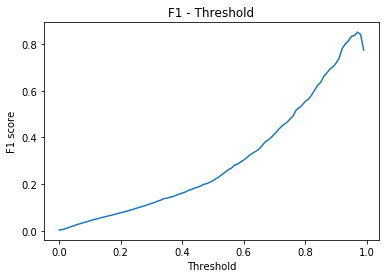

In [88]:
print('Threshold for max. F1 score: ' +str(f1_probs[f1_probs.f1==f1_probs.f1.max()].probs.values[0]))

plt.figure();
plt.plot(f1_probs.probs, f1_probs.f1);
plt.xlabel('Threshold');
plt.ylabel('F1 score');
plt.title('F1 - Threshold');
plt.show();

## Check on the test set

In [70]:
y_prob_lgb=lgb_model.predict(X_test)

In [71]:
y_prob_lgb

array([0.01407751, 0.00990288, 0.02794184, ..., 0.01345464, 0.02592773,
       0.00491188])

In [119]:
pred_threshold=0.5
y_pred_lgb = (y_prob_lgb>=pred_threshold)*1

Text(0.5,1,'Confusion matrix')

Text(87,0.5,'True class')

Text(0.5,87,'Predicted class')

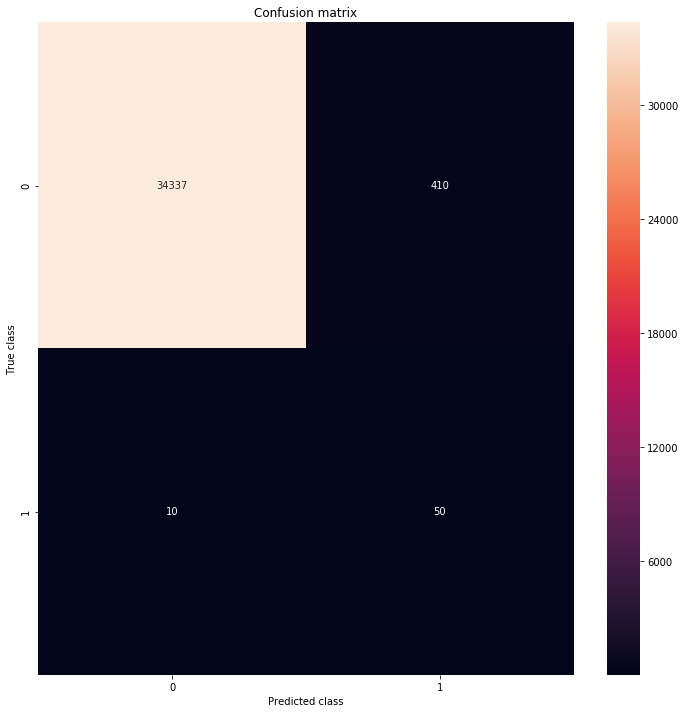

0.1923076923076923

0.9723369403593596

In [120]:
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

f1_score(y_test, y_pred_lgb)
roc_auc_score(y_test,y_prob_lgb)